In [1]:
import pandas as pd
import io
import requests

In [2]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import pandas as pd

dataset = pd.read_csv('/content/drive/My Drive/dataset/84_Loeschcke_et_al_2000_Wing_traits_&_asymmetry_lab pops.csv')
# dataset = pd.read_csv('/content/drive/My Drive/dataset/83_Loeschcke_et_al_2000_Thorax_&_wing_traits_lab pops.csv')
dataset = pd.read_csv('')
print(dataset.head())

FileNotFoundError: [Errno 2] No such file or directory: ''

In [ ]:
import sklearn

In [ ]:
num_columns = dataset.shape[1]
print("Number of columns:", num_columns)

Number of columns: 16


In [ ]:
dataset.head()

,Species,Population,Latitude,Longitude,Year_start,Year_end,Temperature,Vial,Replicate,Sex,Thorax_length,l2,l3p,l3d,lpd,l3,w1,w2,w3,wing_loading
0,D._aldrichi,Binjour,-25.52,151.45,1994,1994,20,1,1,female,1.238,2.017,0.659,1.711,2.370,2.370,1.032,1.441,1.192,1.914
1,D._aldrichi,Binjour,-25.52,151.45,1994,1994,20,1,1,male,1.113,1.811,0.609,1.539,2.148,2.146,0.938,1.299,1.066,1.928
2,D._aldrichi,Binjour,-25.52,151.45,1994,1994,20,1,2,female,1.215,1.985,0.648,1.671,2.319,2.319,0.991,1.396,1.142,1.908
3,D._aldrichi,Binjour,-25.52,151.45,1994,1994,20,1,2,male,1.123,1.713,0.596,1.495,2.091,2.088,0.958,1.286,1.062,1.860
4,D._aldrichi,Binjour,-25.52,151.45,1994,1994,20,2,1,female,1.218,1.938,0.641,1.658,2.298,2.298,1.010,1.418,1.148,1.886


In [ ]:
missing_values = dataset.isnull().sum()
("Missing Values:\n", missing_values)

('Missing Values:\n',
 Species                  0
 Population               0
 Latitude                 0
 Longitude                0
 Year_start               0
 Year_end                 0
 Temperature              0
 Vial                     0
 Replicate                0
 Sex                      0
 Wing_area                1
 Wing_shape              19
 Wing_vein                6
 Asymmetry_wing_area     26
 Asymmetry_wing_shape    26
 Asymmetry_wing_vein     14
 dtype: int64)

In [ ]:
categorical_columns = ['Species', 'Population', 'Sex']
for col in categorical_columns:
  print("Unique values for", col, ":", dataset[col].unique())

Unique values for Species : ['D._aldrichi' 'D._buzzatii']
Unique values for Population : ['Binjour' 'Gogango_Creek' 'Grandchester' 'Oxford_Downs' 'Wahruna']
Unique values for Sex : ['female' 'male']


In [ ]:
print("Dataset Overview:")
print(dataset.info())

Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1731 entries, 0 to 1730
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Species        1731 non-null   object 
 1   Population     1731 non-null   object 
 2   Latitude       1731 non-null   float64
 3   Longitude      1731 non-null   float64
 4   Year_start     1731 non-null   int64  
 5   Year_end       1731 non-null   int64  
 6   Temperature    1731 non-null   int64  
 7   Vial           1731 non-null   int64  
 8   Replicate      1731 non-null   int64  
 9   Sex            1731 non-null   object 
 10  Thorax_length  1731 non-null   object 
 11  l2             1731 non-null   float64
 12  l3p            1731 non-null   float64
 13  l3d            1731 non-null   float64
 14  lpd            1731 non-null   float64
 15  l3             1731 non-null   float64
 16  w1             1731 non-null   float64
 17  w2             1731 non-null   flo

In [ ]:
numerical_features = ['Latitude', 'Longitude', 'Temperature', 'Thorax_length', 'l2', 'l3p', 'l3d', 'lpd', 'l3', 'w1', 'w2', 'w3']
summary_stats = dataset[numerical_features].describe()
print('\n Summary Statistics for Numerical Features:')
print(summary_stats)


 Summary Statistics for Numerical Features:
          Latitude    Longitude  Temperature           l2          l3p  \
count  1731.000000  1731.000000  1731.000000  1731.000000  1731.000000   
mean    -24.794910   150.821693    24.982669     1.723935     0.585854   
std       1.958099     1.220711     4.076542     0.165536     0.053610   
min     -27.680000   148.850000    20.000000     0.000000     0.000000   
25%     -25.520000   150.170000    20.000000     1.607000     0.547000   
50%     -25.200000   151.170000    25.000000     1.722000     0.585000   
75%     -23.770000   151.450000    30.000000     1.840000     0.624000   
max     -21.770000   152.450000    30.000000     2.095000     0.742000   

               l3d          lpd           l3           w1           w2  \
count  1731.000000  1731.000000  1731.000000  1731.000000  1731.000000   
mean      1.455826     2.041169     2.040291     0.914038     1.252196   
std       0.128044     0.178219     0.178354     0.074163     0.10

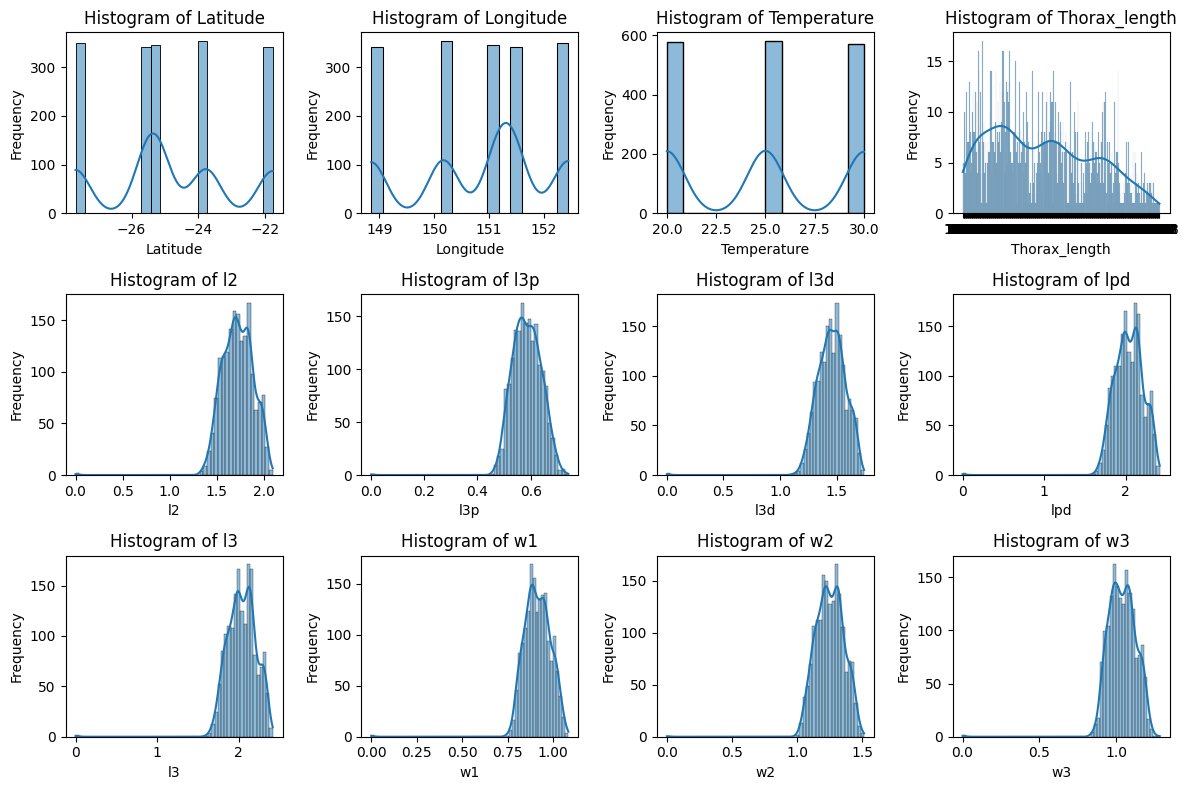

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize = (12, 8))
for i, feature in enumerate(numerical_features, 1):
  plt.subplot(3, 4, i)
  sns.histplot(dataset[feature], kde = True)
  plt.title(f'Histogram of {feature}')
  plt.xlabel(feature)
  plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

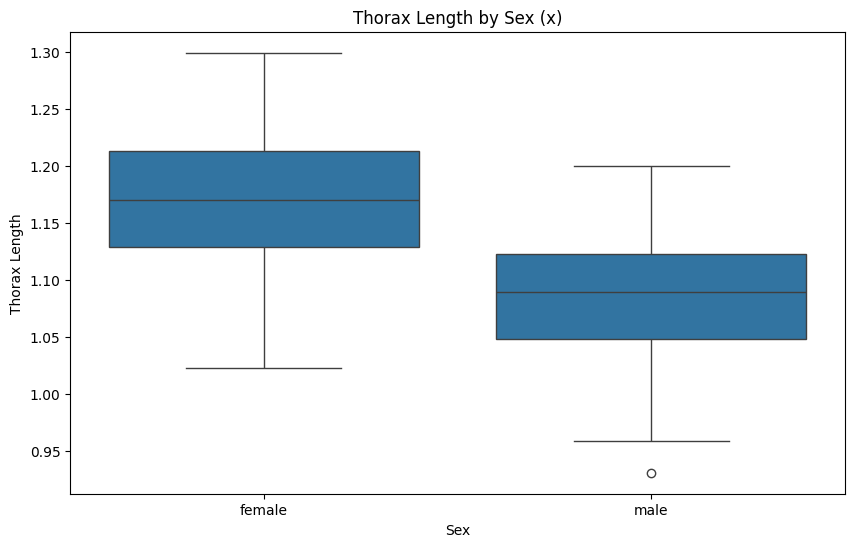

In [ ]:
dataset['Thorax_length'] = pd.to_numeric(dataset['Thorax_length'], errors='coerce')

dataset = dataset.dropna(subset = ['Thorax_length'])

plt.figure(figsize = (10,6))
sns.boxplot(x = 'Sex', y = 'Thorax_length', data = dataset)
plt.title('Thorax Length by Sex (x)')
plt.xlabel('Sex')
plt.ylabel('Thorax Length')
plt.show()

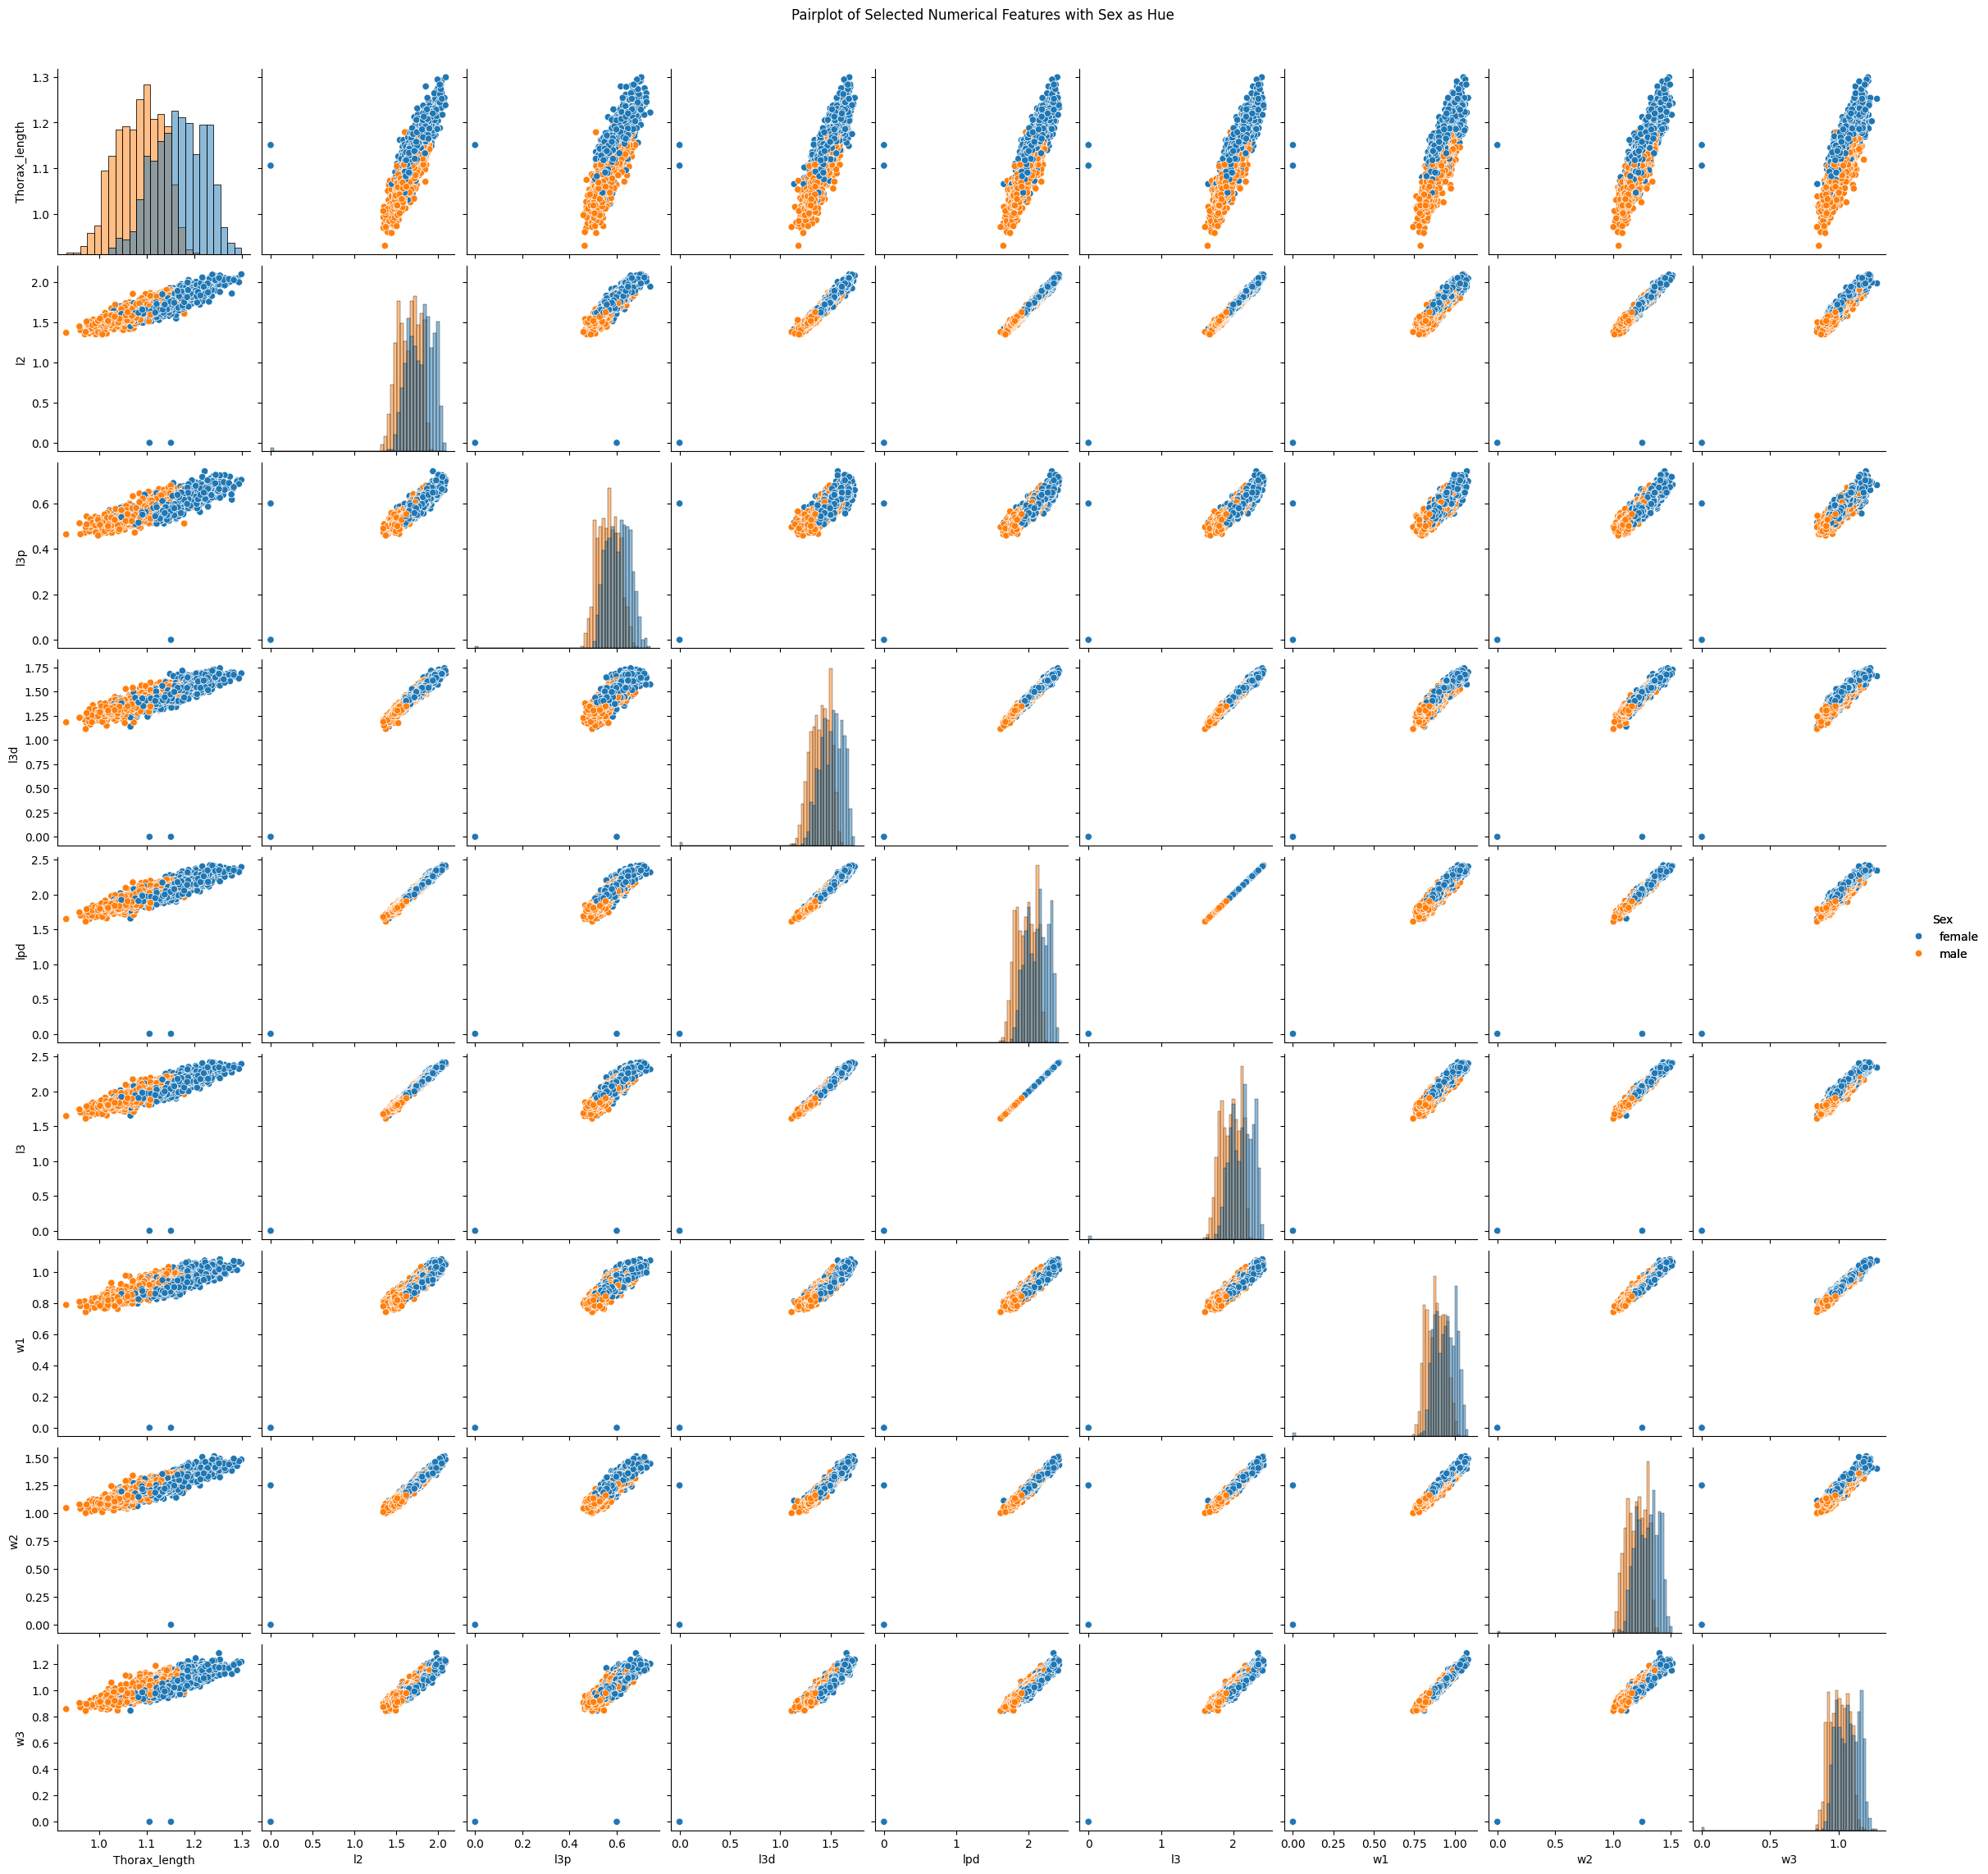

In [ ]:
numerical_features = ['Thorax_length', 'l2', 'l3p', 'l3d', 'lpd', 'l3', 'w1', 'w2', 'w3']

pairplot = sns.pairplot(dataset, vars=numerical_features, hue = 'Sex', diag_kind = 'hist')
plt.suptitle('Pairplot of Selected Numerical Features with Sex as Hue', y = 1.02)

pairplot.add_legend()

plt.show()

<ipython-input-32-402213748bd5>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['Sex_numeric'] = label_encoder.fit_transform(dataset['Sex'])


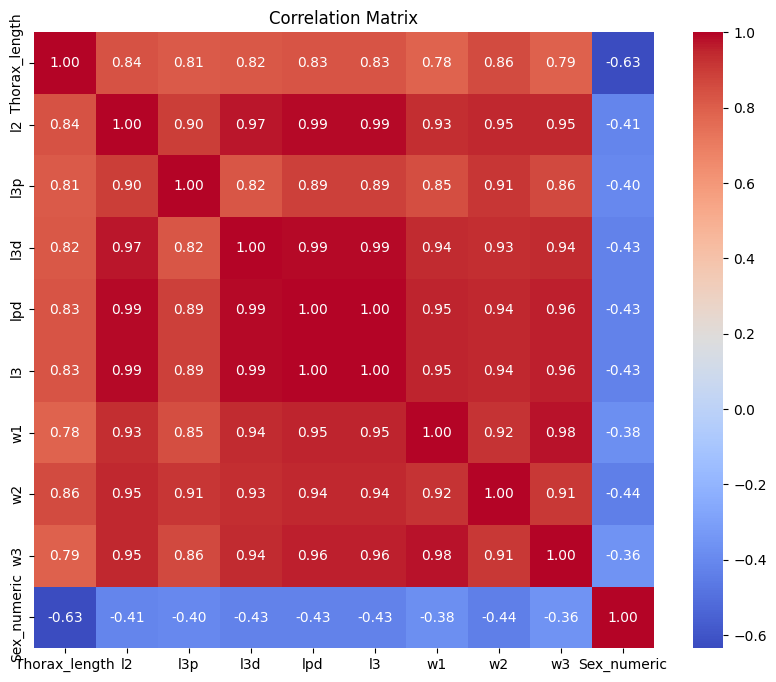

In [ ]:
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

label_encoder = LabelEncoder()
dataset['Sex_numeric'] = label_encoder.fit_transform(dataset['Sex'])

all_features = numerical_features + ['Sex_numeric']

correlation_matrix = dataset[all_features].corr()

plt.figure(figsize = (10, 8))
sns.heatmap(correlation_matrix, annot = True, cmap = 'coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()



In [ ]:
from sklearn.model_selection import train_test_split

features = ['Thorax_length', 'l2', 'l3p', 'l3d', 'lpd', 'l3', 'w1', 'w2', 'w3', 'wing_loading']
X = dataset[features]
y = dataset['Sex']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify = y)

print("Training set shape (X_train):", X_train.shape)
print("Training set shape (y_train):", y_train.shape)
print("Training set shape (X_test):", X_test.shape)
print("Training set shape (y_test):", y_test.shape)

Training set shape (X_train): (1384, 10)
Training set shape (y_train): (1384,)
Training set shape (X_test): (346, 10)
Training set shape (y_test): (346,)


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

logistic_model = LogisticRegression()

logistic_model.fit(X_train, y_train)

y_pred_logistic = logistic_model.predict(X_test)

accuracy_logistic = accuracy_score(y_test, y_pred_logistic)
report_logistic = classification_report(y_test, y_pred_logistic)

print("Logistic Regression Accuracy:", accuracy_logistic)
print("Logistic Regression Classification Report:\n", report_logistic)

Logistic Regression Accuracy: 0.7947976878612717
Logistic Regression Classification Report:
               precision    recall  f1-score   support

      female       0.82      0.76      0.79       172
        male       0.78      0.83      0.80       174

    accuracy                           0.79       346
   macro avg       0.80      0.79      0.79       346
weighted avg       0.80      0.79      0.79       346



In [ ]:
from sklearn.tree import DecisionTreeClassifier

decision_tree_model = DecisionTreeClassifier()

decision_tree_model.fit(X_train, y_train)

y_pred_tree = decision_tree_model.predict(X_test)

accuracy_tree = accuracy_score(y_test, y_pred_tree)
report_tree = classification_report(y_test, y_pred_tree)

print("Decision Tree Accuracy:", accuracy_tree)
print("Decision Tree Classification Report:\n", report_tree)

Decision Tree Accuracy: 0.8005780346820809
Decision Tree Classification Report:
               precision    recall  f1-score   support

      female       0.81      0.78      0.80       172
        male       0.79      0.82      0.81       174

    accuracy                           0.80       346
   macro avg       0.80      0.80      0.80       346
weighted avg       0.80      0.80      0.80       346



In [ ]:
from sklearn.ensemble import RandomForestClassifier

random_forest_model = RandomForestClassifier()

random_forest_model.fit(X_train, y_train)

y_pred_forest = random_forest_model.predict(X_test)

accuracy_forest = accuracy_score(y_test, y_pred_forest)
report_forest = classification_report(y_test, y_pred_forest)

print("Random Forest Accuracy:", accuracy_forest)
print("Random Forest Classification Report:\n", report_forest)

Random Forest Accuracy: 0.8323699421965318
Random Forest Classification Report:
               precision    recall  f1-score   support

      female       0.86      0.80      0.83       172
        male       0.81      0.87      0.84       174

    accuracy                           0.83       346
   macro avg       0.83      0.83      0.83       346
weighted avg       0.83      0.83      0.83       346



In [ ]:
from sklearn.svm import SVC

svm_model = SVC(probability = True)

svm_model.fit(X_train, y_train)

y_pred_svm = svm_model.predict(X_test)

accuracy_svm = accuracy_score(y_test, y_pred_svm)
report_svm = classification_report(y_test, y_pred_svm)

print("SVM Accuracy:", accuracy_svm)
print("SVM Classification Report:\n", report_svm)

SVM Accuracy: 0.8352601156069365
SVM Classification Report:
               precision    recall  f1-score   support

      female       0.90      0.75      0.82       172
        male       0.79      0.92      0.85       174

    accuracy                           0.84       346
   macro avg       0.85      0.83      0.83       346
weighted avg       0.84      0.84      0.83       346



In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

gbm_model = GradientBoostingClassifier()

gbm_model.fit(X_train, y_train)

y_pred_gbm = gbm_model.predict(X_test)

accuracy_gbm = accuracy_score(y_test, y_pred_gbm)
report_gbm = classification_report(y_test, y_pred_gbm)

print("GBM Accuracy:", accuracy_gbm)
print("GBM Classification Report:\n", report_gbm)

GBM Accuracy: 0.8323699421965318
GBM Classification Report:
               precision    recall  f1-score   support

      female       0.87      0.78      0.82       172
        male       0.81      0.88      0.84       174

    accuracy                           0.83       346
   macro avg       0.84      0.83      0.83       346
weighted avg       0.84      0.83      0.83       346



In [ ]:
!pip install scikit-optimize

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.7/107.7 kB 2.5 MB/s eta 0:00:00


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from scipy.stats import expon, reciprocal

#dataset = pd.read_csv('/content/drive/My Drive/dataset/83_Loeschcke_et_al_2000_Thorax_&_wing_traits_lab pops.csv')

features = ['Thorax_length', 'l2', 'l3p', 'l3d', 'lpd', 'l3', 'w1', 'w2', 'w3', 'wing_loading']
#l2	l3p	l3d	lpd	l3	w1	w2	w3	wing_loading
X = dataset[features]
#X = dataset['Thorax_length', 'l2', 'l3p', 'l3d', 'lpd', 'l3', 'w1', 'w2', 'w3', 'wing_loading']

y = dataset['Sex']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify = y)

param_dist = {
    'C': reciprocal(1e-6, 1e+6),
    'gamma': reciprocal(1e-6, 1e+6),
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid']
}

svm_model = SVC(probability = True)

random_search = RandomizedSearchCV(svm_model, param_distributions=param_dist, n_iter=2, cv=5, scoring = 'accuracy', random_state = 42, n_jobs = 100)
random_search.fit(X_train, y_train)

best_params = random_search.best_params_
print("Best Hyperparameters (Randomized Search):", best_params)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
8 fits failed out of a total of 10.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
8 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py", line 192, in fit
    X, y = self._validate_data(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 584, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils

ValueError: could not convert string to float: '.'

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify = y)

svm_model = SVC()

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.1, random_state = 42, stratify = y_train)

best_val_accuracy = -1
best_svm_model = None

for C in [0.1, 1, 10]:
  for gamma in ['scale', 'auto']:
    svm_model = SVC (C=C, gamma=gamma)
    svm_model.fit(X_train, y_train)

    y_val_pred = svm_model.predict(X_val)
    val_accuracy = accuracy_score(y_val, y_val_pred)

    if val_accuracy > best_val_accuracy:
      best_val_accuracy = val_accuracy
      best_svm_model = svm_model

print("Best Hyperparameters (SVM with Early Stopping)", best_svm_model.get_params())

ValueError: could not convert string to float: '.'

In [ ]:
!pip install scikit-learn

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size = 0.2, stratify = y_encoded)

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify = y_train)
#label_encoder = LabelEncoder()
#y_encoded = label_encoder.fit_transform(y)
results = []

X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size = 0.2, stratify = y_encoded)

for C in [0.1, 1, 10]:
  for gamma in ['scale', 'auto']:
    svm_model = SVC (C=C, gamma=gamma)
    svm_model.fit(X_train, y_encoded)

    y_val_pred = svm_model.predict(X_val)
    val_accuracy = accuracy_score(y_val, y_val_pred)

    results.append((C, gamma, val_accuracy))

results_df = pd.DataFrame(results, columns =['C', 'gamma', 'val_accuracy'])

for gamma in results_df['gamma'].unique():
  subset = results_df[results_df['gamma'] == gamma]
  plt.plot(subset['C'], subset['val_accuracy'], label = f'gamma={gamma}')

plt.xlabel('C')
plt.ylabel('Validation Accuracy')
plt.title('Validation Accuracy for SVM with Different Hyperparameters')
plt.legend()
plt.xscale('log')
plt.show()

ValueError: could not convert string to float: '.'

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, roc_auc_score
import seaborn as sns
import matplotlib.pyplot as plt

rf_model = RandomForestClassifier()

rf_model.fit(X_train, y_train)

rf_predictions = rf_model.predict(X_test)

rf_cm = confusion_matrix(y_test, rf_predictions)

plt.figure(figsize = (8,6))
sns.heatmap(rf_cm, annot = True, fmt = 'd', cmap = 'Blues', cbar = False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - Random Forest')
plt.show()

ValueError: y should be a 1d array, got an array of shape (1731, 10) instead.

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

rf_base_estimator = RandomForestClassifier(random_state = 42)
ada_model = AdaBoostClassifier(base_estimator = rf_base_estimator, random_state = 42)

param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.1, 0.5, 1.0]
}

grid_search = GridSearchCV(estimator=ada_model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print("Best Hyperparameters (Grid Search):", best_params)

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

rf_base_estimator = RandomForestClassifier(random_state=42)
ada_model = AdaBoostClassifier(base_estimator=rf_base_estimator, random_state=42)

param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.1, 0.5, 1.0]
}

grid_search = GridSearchCV(estimator=ada_model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

cv_results = pd.DataFrame(grid_search.cv_results_)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

X, Y = np.meshgrid(param_grid['n_estimators'], param_grid['learning_rate'])
Z = cv_results.pivot(index='param_learning_rate', columns='param_n_estimators', values = 'mean_test_score').values

ax.plot_surface(X, Y, Z, cmap = 'viridis')

ax.set_xlabel('Number of Estimators')
ax.set_ylabel('Learning Rate')
ax.set_zlabel('Mean Validation Accuracy')
ax.set_title('Validation Accuracy for AdaBoost with Different Hyperparameters')

plt.show()

In [ ]:
X = [[0], [1], [2], [3]]
y = [0, 0, 1, 1]
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X, y)
#KNeighborsClassifier(...)
print(neigh.predict([[3.1]])) #x is the matrix, majority
#[0]
print(neigh.predict_proba([[0.9]]))

[1]
[[0.66666667 0.33333333]]
